# Problem Set 3, due February 10 at 11:59am (i.e., noon).

###Before You Start

Make sure the following libraries load correctly (hit Ctrl-Enter). Note that while you are loading several powerful libraries, including machine learning libraries, the goal of this problem set is to implement several algorithms from scratch. In particular, you should *not* be using any built-in libraries for nearest neighbors, distance metrics, or cross-validation -- your mission is to write those algorithms in Python! Parts 1 and 2 will be relatively easy; Part 3 will take more time.

*Also note:* For this assignment we are requiring you to use base **matplotlib** - no more Seaborn or other packages. This will help you become familiar with techniques for maintaining fine-grained control over your data visualizations. It will also help our graders, who spent countless hours trying to make various versions import for grading.

In [44]:
import IPython
import numpy as numpy
import scipy as sp
import pandas as pd
import matplotlib
import sklearn
from matplotlib.lines import Line2D
from matplotlib.text import Text

---

## Introduction to the assignment

For this assignment, you will be using the [Boston Housing Prices Data Set](http://archive.ics.uci.edu/ml/datasets/Housing).  Please read about the dataset carefully before continuing.  Use the following commands to load the dataset:


In [45]:
from sklearn.datasets import load_boston
bdata = load_boston()

The following commands will provide some basic information about the shape of the data:

In [60]:
print(bdata.keys())
print(bdata.feature_names)
print(bdata.data.shape)
print(bdata.target.shape)
# uncomment the following if you want to see a lengthy description of the dataset
print(bdata.DESCR)

dict_keys(['data', 'target', 'feature_names', 'DESCR'])
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
(506, 13)
(506,)
Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD 

---

##Part 1: Descriptive analysis

Before beginning the "real" work, dig into the data a bit do see what you're dealing with.  If you're new to analyzing data in Python, please make sure to read the relevant readings linked to on Canvas before beginning (for instance, [this one](https://github.com/jrjohansson/scientific-python-lectures)).

###1.1: Histogram of housing prices

Below you will find some very basic code to make a very basic histogram of median housing prices (the "target" variable) for your dataset.  Your first task is to make this graph look pretty by doing the following:

1. Add appropriate labels to the x and y axes, make sure to include units
2. Change the bin width on the histogram to be $1000
3. Remove the axes on the top and right side of the plot window
4. Change the color of the bars to be green, and remove the black borders from the bars


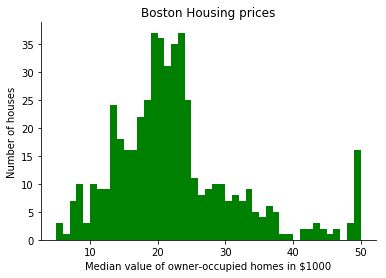

In [87]:
# prepare IPython to work with matplotlib and import the library to something convenient
%matplotlib inline  
import matplotlib.pyplot as plt  

# Use subplot feature to remove the top and right axes
axes = plt.subplot() 
axes.spines["top"].set_visible(False)  
axes.spines["right"].set_visible(False)  

#Set bin width to 1
binwidth=1
#Plot the histgram with green color
plt.hist(bdata.target, color='g', bins=np.arange(min(bdata.target), max(bdata.target) + binwidth, binwidth))
#Label the axis
plt.xlabel('Median value of owner-occupied homes in $1000')
plt.ylabel('Number of houses')
#Label the title
plt.title('Boston Housing prices')





In [88]:
#Convert data into a dataframe
boston_df =  pd.DataFrame(bdata.data)
#Add column names
boston_df.columns = bdata.feature_names
#Add the median price as a column in the dataframe
boston_df['PRICE'] = bdata.target
#Observe the top 4 rows and all columns
boston_df.head(4)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4


###1.2: Scatter plot of housing prices and crime

Use matplotlib to create a scatter plot that shows the relationship between the median value of the home (y-axis) and the per-capita crime rate (x-axis).  Properly label your axes, and make sure that your graphic looks polished and professional.


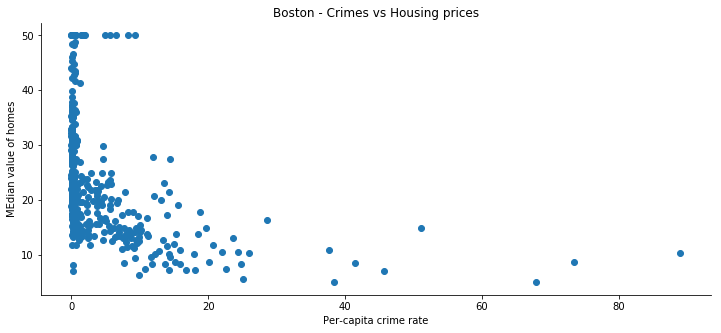

In [86]:
#Set size of plot
plt.figure(1,figsize=(12,5))
#Use sub plot features to remove top and right axis
axes = plt.subplot() 
axes.spines["top"].set_visible(False)  
axes.spines["right"].set_visible(False)  
#Plot a scatter plot
plt.scatter(boston_df.CRIM, boston_df.PRICE)
#Set the axis labels
plt.xlabel('Per-capita crime rate')
plt.ylabel('Median value of homes')
#Set the plot title
plt.title('Boston - Crimes vs Housing prices')


###1.3 Create your own (creative and effective) visualization

Use another type of graph or chart to illustrate an interesting pattern in the data.  Be creative in your visualization, and make sure to produce a "publication-quality" graph.  Points will be given for useful and creative graphs; points will be deducted for confusing issues like unlabeled axes.  If you're new to data visualization, [this guide](http://pubs.aeaweb.org/doi/pdfplus/10.1257/jep.28.1.209) is a good place to start.

I will use the pupil teacher ratio to find the relation between it and the median household incomes.

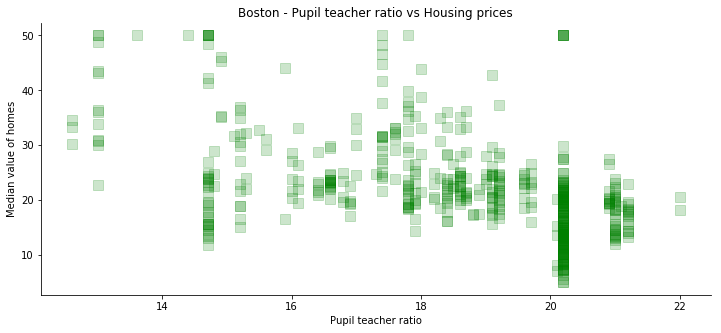

In [110]:
##Set size of plot
plt.figure(1,figsize=(12,5))
#Use sub plot features to remove top and right axis
axes = plt.subplot() 
axes.spines["top"].set_visible(False)  
axes.spines["right"].set_visible(False)  
#Plot a scatter plot
#Plot a scatter plot
plt.scatter(boston_df.PTRATIO,boston_df.PRICE,color='g', marker='s', alpha=.2,s=100)
#Set the axis labels
plt.xlabel('Pupil teacher ratio')
plt.ylabel('Median value of homes')
#Set the plot title
plt.title('Boston - Pupil teacher ratio vs Housing prices')



The above graphs shows the pupil teacher ratio vs the median value of household incomes. The alpha value or the lightness and darkness of the plot determines the number of obervations in the same range. An overlap of plots also causes them to be darker.

---

##Part 2: Experimental Setup

The goal of the next few sections is to design an experiment to predict the median home value for an instance in the data.

###2.1 Begin by writing a function to compute the Root Mean Squared Error for a list of numbers

You can find the sqrt function in the Numpy package. Furthermore the details of RMSE can be found on [Wikipedia](http://en.wikipedia.org/wiki/Root-mean-square_deviation)



In [116]:
"""
Function
--------
compute_rmse

Given two arrays, one of actual values and one of predicted values,
compute the Roote Mean Squared Error

Parameters
----------
predictions : array
    Array of numerical values corresponding to predictions for each of the N observations

yvalues : array
    Array of numerical values corresponding to the actual values for each of the N observations

Returns
-------
rmse : int
    Root Mean Squared Error of the prediction

Example
-------
>>> print compute_rmse((2,2,3),(0,2,6)
2.16
"""
def compute_rmse(predictions, yvalues):
    se= 0
    for x in range(0,len(predictions)):
      se += ((predictions[x] - yvalues[x])**2)
    mse=float(se)/len(predictions)
    rmse=np.sqrt(mse)
    return rmse

compute_rmse((2,2,3),(0,2,6))

2.0816659994661326

###2.2 Divide your data into training and testing datasets

Randomly select 66% of the data and put this in a training dataset (call this "bdata_train"), and place the remaining 34% in a testing dataset (call this "bdata_test")


In [121]:
# leave the following line untouched, it will help ensure that your "random" split is the same "random" split used by the rest of the class
np.random.seed(seed=13579)

# Use numpy to append 
bdata_all = np.hstack((bdata.data, np.atleast_2d(bdata.target).T))
bdata_all= np.hstack((bdata_all, np.atleast_2d(np.arange(0,506,1)).T))

#Split into train and test
bdata_train = bdata_all[0:int(np.ceil(len(bdata_all)*0.66)),:]
bdata_test = bdata_all[int(np.ceil(len(bdata_all)*0.66)):,:]


###2.3 Use a very bad baseline for prediction, and compute RMSE

Create a model that predicts, for every observation x_i, that the median home value is the average (mean) of the median values for all instances in the training set.  Compute the RMSE on the training set.  Now compute the RMSE on the test data set (but use the model you trained on the training set!).  How does RMSE compare for training vs. testing datasets? Is this what you expected, and why?

In [123]:
def mean_model(training_data, testing_data):
    mean = training_data[:,13:14][:,0].mean()
    for i in range(0,len(testing_data[0])):
        testing_data[1,i] = mean
    return testing_data

# Store values in an array for acutal and predicted median house values for training dataset
train_predict = np.array([bdata_train[:,13:14][:,0],np.zeros(len(bdata_train))])

# USe mean model function and rmse function
train_predict = mean_model(bdata_train, train_predict)
train_rmse = compute_rmse(train_predict[0],train_predict[1])
print("Train RMSE:",train_rmse)

# Store values in an array for acutal and predicted median house values for test dataset
test_predict = np.array([bdata_test[:,13:14][:,0],np.zeros(len(bdata_test))])

# Calling our mean model function and passing the results to rmse function
test_predict = mean_model(bdata_train, test_predict)
test_rmse = compute_rmse(test_predict[0],test_predict[1])
print("Test RMSE:",test_rmse)


Train RMSE: 8.57279016332
Test RMSE: 11.2627239924


The train RMSE is less than the test RMSE. THis is since we took the mean of all the median house values in the training dataset. 

---

##Part 3: Nearest Neighbors


###3.1 Nearest Neighbors: Distance function
Let's try and build a machine learning algorithm to beat the "Average Value" baseline that you computed above.  Soon you will implement the Nearest Neighbor algorithm, but first you need to create a distance metric to measure the distance (and similarity) between two instances.  Write a generic function to compute the L-Norm distance (called the [*p*-norm](http://en.wikipedia.org/wiki/Norm_(mathematics) distance on Wikipedia). Verify that your function works by computing the Euclidean distance between the points (3,4) and (6,8).

In [137]:
"""
Function
--------
distance

Given two instances and a value for L, return the L-Norm distance between them

Parameters
----------
x1, x2 : array
    Array of numerical values corresponding to predictions for each of the N observations

L: int
    Value of L to use in computing distances

Returns
-------
dist : int
    The L-norm distance between instances

Example
-------
>>> print distance((3,4),(6,8),2)
7

"""
def distance(x, y, L):
    dist = abs((x-y))**L
    dist = (dist.sum(axis=1))**(1/float(L))
    return dist

d1 = lnorm_distance((3,4),(6,8),2)

print("D1: ", d1)

D1:  5.0


###3.2 Basic Nearest Neighbor algorithm

Now things get fun.  Your task is to implement a basic nearest neighbor algorithm from scratch.  Your simple model will use two input features (CRIM and RM) and a single output (MEDV).  In other words, you are modelling the relationship between median home value and crime rates and house size.

Use your training data (bdata_train) to "fit" your model, although as you know, with Nearest Neighbors there is no real training, you just need to keep your training data in memory.  Write a function that predicts, for each instance in the testing data (bdata_test), the median home value using the nearest neighbor algorithm we discussed in class.  Since this is a small dataset, you can simply compare your test instance to every instance in the training set, and return the MEDV value of the closest training instance.  Have your function take L as an input, where L is passed to the distance function.

Compute the RMSE for the Nearest Neighbor predictions on the test set, using the Euclidean distance.  Report an estimate of the total time taken by your code to predict the nearest neighbors for all the values in the test data set.

In [162]:
"""
# write your function specification here!


"""
import time
def nneighbor(train_data, test_data, predictors, L):
    start_time = time.time()
    
    # Creating array with only the median values for train and test
    medv_train = train_data[:,13:14]
    medv_test = test_data[:,13:14]
    
    #Creating array to store the actual and predicted median values and the predictores
    train_arr = np.hstack((medv_train, np.atleast_2d(np.arange(0,len(medv_train),1)).T))
    test_arr = np.hstack((medv_test, np.atleast_2d(np.arange(0,len(medv_test),1)).T))
    
    # Iterating the remaining columns based on number of predictors
    for predictor in predictors:
        train_arr = np.hstack((train_arr, np.atleast_2d(train_data[:,np.where(bdata.feature_names == predictor)[0][0]]).T))
        test_arr = np.hstack((test_arr, np.atleast_2d(test_data[:,np.where(bdata.feature_names == predictor)[0][0]]).T))
    
    # Creating a new array which will hold all the training values for training data and one value repeated for the test data
    temp_train = np.empty([len(train_data), len(predictors)])
    temp_train[:,:] = train_arr[:,2:]    
    sorted_train = train_arr
    temp_test = np.empty([len(train_data), len(predictors)])
    
    #o compute the corresponding distance for test data and store the distance in array. Consider smallest distance
    for i in range(0,len(test_arr)):  
        temp_test[:,:] = test_arr[i,2:]
        dist = distance(temp_test, temp_train, L)
        train_arr[:,1] = dist 
        sorted_train = train_arr
        sorted_train = train_arr[train_arr[:,1].argsort()]          
        test_arr[i,1] = sorted_train[0,0]
        
    #Computing the RMSE
    rmse = compute_rmse(test_arr[:,0],test_arr[:,1])
    print("Time taken: " + str(round(time.time() - start_time,2)) + " seconds")
    print('RMSE =',rmse,'\n')
    
    return rmse


# Prepare dataset to pass to function
train_dataset = np.copy(bdata_train[:])
test_dataset = np.copy(bdata_test[:])
predictors = ['CRIM','RM']
L = 2

# Running function
nneighbor(train_dataset, test_dataset, predictors, L)

Time taken: 0.01 seconds
RMSE = 8.17911051626 



8.179110516260879

###3.3 Results and Normalization

If you were being astute, you would have noticed that we never normalized our features -- a big no-no with Nearest Neighbor algorithms.  Write a generic normalization function that takes as input an array of values for a given feature, and returns the normalized array (subtract the mean and divide by the standard deviation).

Re-run the Nearest Neighbor algorithm on the normalized dataset (still just using CRIM and RM as input), and compare the RMSE from this method with your previous RMSE evaluations.

*NOTE*: To normalize properly, best practice is to compute the mean and standard deviation on the training set, and use these values to normalize the testing dataset. However, for this problem set, it is okay if you separately normalize each dataset using the respective mean and standard deviation.

In [163]:
"""
# write your function specification here!
"""

#Helper function to calculate normalized value
def norm(raw_data):
    mean = np.mean(raw_data)
    sd = np.std(raw_data)
    for i in range(0,len(raw_data)):
        raw_data[i] = (raw_data[i] - mean)/sd
    return raw_data

def normalize(predictors, is_cv):
     # If data to be passed to cross validagtion function return one dataset
    if is_cv:
        # Copying main data array to a new data array
        n_data = np.copy(bdata_all[:])
        
        # Iterating the predictor columns and getting them normalized
        for p in predictors:
            n_data[:,np.where(bdata.feature_names == p)[0][0]] = norm(n_data[:, np.where(bdata.feature_names == p)[0][0]])
        return (n_data,None)
    
    # else return test and training dataset if we dont have to pass value to cross validation function
    else :
        # Copying test and train array to a new array
        n_train = np.copy(bdata_train[:])
        n_test = np.copy(bdata_test[:])
        
        # Iterating the predictor columns and getting them normalized
        for p in predictors:
            n_train[:,np.where(bdata.feature_names == p)[0][0]] = norm(n_train[:, np.where(bdata.feature_names == p)[0][0]])
            n_test[:,np.where(bdata.feature_names == p)[0][0]] = norm(n_test[:, np.where(bdata.feature_names == p)[0][0]])
        return (n_train, n_test)
    return normalized_data

# Set parameter values
predictors = ['CRIM','RM']
L = 2
is_cv = False

# Running the normalize function
normalized = normalize(predictors,is_cv)
nn_norm = nneighbor(normalized[0], normalized[1], predictors, L)

Time taken: 0.01 seconds
RMSE = 11.9756026211 



WE notice that when the RMSE is normalized we get a bette prediction value compared to when the data is not normalized.

###3.4 Optimization

A lot of the decisions we've made so far have been arbitrary.  Try to increase the performance of your nearest neighbor algorithm by adding features that you think might be relevant, and by using different values of L in the distance function.  Try a model that uses a different set of 2 features, then try at least one model that uses more than 4 features, then try using a different value of L.  If you're having fun, try a few different combinations of features and L!

What combination of features and distance function provide the lowest RMSE?  Do your decisions affect the running time of the algorithm?

In [164]:
#Use different features of dataset
predictors = ['NOX','RM']
L = 2
is_cv = False

normalized2 = normalize(predictors,is_cv)
nneighbor(normalized2[0], normalized2[1], predictors, L)

Time taken: 0.01 seconds
RMSE = 13.5442341633 



13.544234163280235

We observe

In [165]:
#use more than 2 features.

predictors = ['CRIM','RM','TAX','LSTAT']
L = 2
is_cv = False

normalized3 = normalize(predictors,is_cv)
nneighbor(normalized3[0], normalized3[1], predictors, L)

Time taken: 0.01 seconds
RMSE = 10.2713617448 



10.27136174482348

### 3.5 Cross-Validation

The more you tinkered with your features and distance function, the higher the risk that you overfit your training data.  To prevent this sort of overfitting, you need to use cross-validation (see K-fold [cross-validation](http://en.wikipedia.org/wiki/Cross-validation_(statistics)).  Here you must implement a simple k-fold cross-validation algorithm yourself.  The function you write here will be used several more times in this problem set, so do your best to write efficient code! (Note that the sklearn package has a built-in [K-fold](http://scikit-learn.org/stable/modules/cross_validation.html#cross-validation) iterator -- you should *not* be invoking that or any related algorithms in this section of the problem set.)

Use 10-fold cross-validation and report the average RMSE for Nearest Neighbors using Euclidean distance with CRIM and RM input features, as well as the total running time for the full run of 10 folds.  In other words, randomly divide your dataset into 10 equally-sized samples, and for each of 10 iterations (the "folds"), use 9 samples as "training data" (even though there is no training in k-NN!), and the remaining 1 sample for testing.  Compute the RMSE of that particular test set, then move on to the next iteration.  Report the average RMSE across the 10 iterations.

In [166]:
def cv(bdata_cv_master, predictors, L,model):
    start_time = time.time()
    
    if model == nneighbor:
        print('NN Model -' + str(predictors))
    else:
        print('KNN Model -' + str(predictors) + ' and value of K - ' + str(K))
    
    ln = len(bdata_cv_master) - (len(bdata_cv_master)%100)
    bdata_cv = [None]*10
    
    # Store train and test cross validation results in array
    train_cv = [np.empty(shape=(0, 15))]*10
    test_cv = [np.empty(shape=(0, 15))]*10
    current = -1
    indi_cv = [None]*10
    total_cv = 0

    # Divide data into 10 folds
    for i in range(0,10):
        bdata_cv[i] = bdata_cv_master[int(np.floor(ln*(i*0.1))):int(np.floor(ln*(i*0.1+0.1))),:]

    # get one fold as test data and use the remaining as train data.
    for i in range(0,10):
        current += 1
        for j in range(0,10):
            if(j != current):
                train_cv[i] = np.vstack((train_cv[i], bdata_cv[j]))
            else:
                test_cv[i] = bdata_cv[i]  
        
        print('Training cv',i,' datasize: ', len(train_cv[i]), '\n'
              'Testing cv',i,' datasize: ', len(test_cv[i]))
        # Using the cross validation datasets to fit model of choice and store returning RMSE
        indi_cv[i] = model(train_cv[i], test_cv[i], predictors,L)
        total_cv = total_cv + indi_cv[i]   
        avg_RMSE = total_cv / 10

    print('AVERAGE RMSE AFTER CROSS VALIDATION:', avg_RMSE)
    print("TOTAL TIME TAKEN:" + str(round(time.time() - start_time,2)) + " seconds")
    
    return avg_RMSE

# Preparing and parameters to be fed to the function
predictors = ['CRIM','RM']
L = 2
is_cv = True
model = nneighbor


# Running the nearest cross validation function and fitting data using nearest neighbor model
normalized = normalize(predictors, is_cv)
nn_cv = cv(normalized[0], predictors, L, model)

NN Model -['CRIM', 'RM']
Training cv 0  datasize:  450 
Testing cv 0  datasize:  50
Time taken: 0.01 seconds
RMSE = 4.9112523861 

Training cv 1  datasize:  450 
Testing cv 1  datasize:  50
Time taken: 0.01 seconds
RMSE = 4.36080267841 

Training cv 2  datasize:  450 
Testing cv 2  datasize:  50
Time taken: 0.01 seconds
RMSE = 4.51590522487 

Training cv 3  datasize:  450 
Testing cv 3  datasize:  50
Time taken: 0.01 seconds
RMSE = 5.53721951886 

Training cv 4  datasize:  450 
Testing cv 4  datasize:  50
Time taken: 0.01 seconds
RMSE = 5.1989422001 

Training cv 5  datasize:  450 
Testing cv 5  datasize:  50
Time taken: 0.01 seconds
RMSE = 4.82709022083 

Training cv 6  datasize:  450 
Testing cv 6  datasize:  50
Time taken: 0.01 seconds
RMSE = 5.12427555855 

Training cv 7  datasize:  450 
Testing cv 7  datasize:  50
Time taken: 0.01 seconds
RMSE = 12.3006910375 

Training cv 8  datasize:  450 
Testing cv 8  datasize:  50
Time taken: 0.01 seconds
RMSE = 9.33779417207 

Training cv 9 

###3.6 K-Nearest Neighbors Algorithm

Implement the K-Nearest Neighbors algorithm.  Using 10-fold cross validation, report the RMSE for K=3 and the running time of the algorithm.

In [64]:
"""
# write your function specification here!
"""
def knn(..., L, K):
    # enter your code here
    return rmse

# enter your additional code here

###3.7 Using cross validation to find K

What is the best choice of K?  Compute the RMSE for values of K between 1 and 25 using 10-fold cross-validation.  Use the following features in your model, and don't forget to normalize: CRIM, ZN, RM, AGE, DIS, TAX.  Create a graph that shows how RMSE changes as K increases from 1 to 25.  Label your axes, and summarize what you see.  What do you think is a reasonable choice of K for this model?

In [ ]:
# enter your code here

*Enter your observations here*